In [32]:
# Importation de nos propres outils
import portfolio_functions as pf
import tickers_select as tckrs
%load_ext autoreload
%autoreload 2

# Traitement des données
import pandas as pd
import numpy as np

# Graphiques
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set(rc={"figure.figsize":(12, 8)})
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Mise en place des données

In [33]:
# Importation du prix
prices = pd.read_csv("datas/adjusted_daily_prices.csv")
# Importation des tickers sélectionnés
tickers = tckrs.tickers

# Affichage du DataFrame
prices.head()

,Date,NSRGY,ASML,ROG.SW,MC.PA,NVO,NVS,VTI,SAP,SIE.DE,...,MF.PA,TIT.MI,ADE.OL,KGX.DE,SALM.OL,UPS,ROCK-B.CO,VSBY.CN,PROX.BR,UN01.DE
0,2005-01-03 00:00:00,19.406073,13.137519,85.102253,56.599998,3.934667,33.440810,43.504051,32.694855,61.000427,...,54.200001,3.06,10.817800,23.540001,4.735596,63.103147,37.261734,0.51,32.770000,10.3
1,2005-01-04 00:00:00,19.304356,12.883060,84.902008,56.299999,3.858613,33.091171,43.532679,31.870259,60.661266,...,53.849998,3.06,10.759532,23.540001,4.710088,63.183368,37.928716,0.51,32.930000,10.3
2,2005-01-05 00:00:00,19.382477,12.698572,84.532489,55.450001,3.821526,32.967802,43.237832,31.784551,59.779449,...,54.150002,3.03,10.776711,23.540001,4.717609,63.064586,37.570233,0.51,32.450001,10.3
3,2005-01-06 00:00:00,19.403709,12.587189,84.744668,55.650002,3.949011,33.026834,43.764542,32.465939,60.341488,...,54.400002,3.06,10.773975,23.540001,4.716411,63.460296,37.365088,0.51,32.160000,10.3
4,2005-01-07 00:00:00,19.447257,12.592865,84.661544,56.049999,4.004297,32.965059,44.031957,33.198153,60.651573,...,54.299999,3.06,10.819771,23.540001,4.736458,63.930943,37.633902,0.51,32.160000,10.3


In [34]:
# On garde uniquement les tickers sélectionnés et la colonne Date
prices = prices[["Date"]+tickers]

# On transforme le type de la colonne Date en datetime64[ns]
prices["Date"] = pd.to_datetime(prices["Date"])

# Affichage du DataFrame
prices.head()

,Date,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,...,LI.PA,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
0,2005-01-03,13.137519,56.599998,33.440810,32.694855,16.481361,4.201927,49.166664,68.918274,53.383133,...,21.145081,0.595,13.85,72.335732,12.785884,12.0,10.643333,31.290252,60.918514,54.200001
1,2005-01-04,12.883060,56.299999,33.091171,31.870259,16.288680,4.216240,48.833332,68.964745,53.524609,...,20.494463,0.595,13.96,70.773827,12.710694,12.0,10.683333,31.733229,60.918514,53.849998
2,2005-01-05,12.698572,55.450001,32.967802,31.784551,15.938569,4.262036,48.299999,68.128250,53.854713,...,20.169153,0.590,13.90,70.529778,12.515922,12.0,10.503333,31.737864,60.918514,54.150002
3,2005-01-06,12.587189,55.650002,33.026834,32.465939,16.181642,4.316150,48.366665,68.453552,53.666080,...,20.169153,0.590,13.86,69.797638,12.366672,12.0,10.456666,31.971365,60.820255,54.400002
4,2005-01-07,12.592865,56.049999,32.965059,33.198153,16.110859,4.310554,47.933334,69.150635,53.854713,...,20.494463,0.588,14.13,71.310730,12.395002,12.0,10.450000,32.270195,60.918514,54.299999


In [35]:
# On fait de la colonne Date l'index
prices.set_index("Date",drop=True,inplace=True)

In [106]:
# Calcul des rendements et on enlève les NaN (au début du DataFrame et à la fin)
rends = prices.pct_change().dropna()

# Affichage des rendements 
rends.head()

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,ISP.MI,...,LI.PA,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.019369,-0.005300,-0.010455,-0.025221,-0.011691,0.003406,-0.006780,0.000674,0.002650,0.002841,...,-0.030769,0.000000,0.007942,-0.021592,-0.005881,0.0,0.003758,0.014157,0.000000,-0.006458
2005-01-05,-0.014320,-0.015098,-0.003728,-0.002689,-0.021494,0.010862,-0.010921,-0.012129,0.006167,0.008498,...,-0.015873,-0.008403,-0.004298,-0.003448,-0.015323,0.0,-0.016849,0.000146,0.000000,0.005571
2005-01-06,-0.008771,0.003607,0.001791,0.021438,0.015251,0.012697,0.001380,0.004775,-0.003503,0.022472,...,0.000000,0.000000,-0.002878,-0.010381,-0.011925,0.0,-0.004443,0.007357,-0.001613,0.004617
2005-01-07,0.000451,0.007188,-0.001870,0.022553,-0.004374,-0.001297,-0.008959,0.010183,0.003515,0.000000,...,0.016129,-0.003390,0.019481,0.021678,0.002291,0.0,-0.000638,0.009347,0.001616,-0.001838
2005-01-10,0.013300,-0.006244,-0.006846,-0.004195,0.006278,0.008651,0.019471,-0.002016,-0.011384,0.000000,...,0.000000,0.002551,-0.006369,0.004107,0.008505,0.0,0.015311,-0.003736,0.004839,0.014733


# 2. Première analyse statique

Dans cette première partie pratique nous allons mettre en place et analyser différentes stratégies de portefeuilles (différentes techniques d'optimisations) de manière assez simple en considérant comme données de tests la période de 2005 à 2010. C'est une partie statique et qui est réalisée uniquement pour comprendre le fonctionnement des différentes fonctions d'optimisations. Par la suite nous ajouterons une optimisation dynamique (définition de nouveaux poids chaque trimestre) puis en partie finale nous prendrons en compte les coûts de transactions pour être plus fidèle à la réalité.

In [107]:
# On définit les dates de début et de fin de notre set d'entrainement
start_train = "2005-01-01"
end_train = "2010-01-01"
end_test = "2022-01-01"

In [190]:
# On utilise la fonction separate du module portfolio_functions pour obtenir nos DataFrames d'entrainement et de tests
rends_train,rends_test = pf.separate(rends,start_train,end_train,end_test)

# On supprime les actions qui n'ont pas que des rendements nuls ou des rendements annualisé negatifs avec la fonction supr_assets
rends_train,rends_test = pf.supr_assets(rends_train,show=True),pf.supr_assets(rends_test,show=True)

Les colonnes supprimées sont :
SAP ISP.MI IDEXF AMS.MC LR.PA G.MI VNA.DE CABK.MC SCMN.SW KBC.BR BNR.DE EBS.VI AENA.MC EXO.AS GBLC.CN RDFN BVI.PA ZAL.DE SIG VIV.PA PNDORA.CO WFDRX MB.MI ATL.MI SECU-B.ST IDVA.SG FR.PA LBGUF MF.PA
Les colonnes supprimées sont :
ISP.MI G.MI CABK.MC EXO.AS GBLC.CN TELIA.ST VIV.PA ATL.MI LI.PA


In [191]:
# On utilise la fonction separate du module portfolio_functions pour obtenir nos DataFrames d'entrainement et de tests
prices_train,prices_test = pf.separate(prices,start_train,end_train,end_test)

In [192]:
rends_train

,ASML,MC.PA,NVS,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,6S=F,...,QGEN,TRN.MI,TELIA.ST,RAND.AS,JMT.LS,LI.PA,BOL.PA,DIE.BR,GFC.PA,COV.PA
Date,,,,,,,,,,,,,,,,,,,,,
2005-01-04,-0.019369,-0.005300,-0.010455,-0.011691,0.003406,-0.006780,0.000674,0.002650,-0.009963,-0.006006,...,0.025191,0.009412,0.003459,-0.001721,0.010152,-0.030769,0.000000,0.007942,-0.021592,0.000000
2005-01-05,-0.014320,-0.015098,-0.003728,-0.021494,0.010862,-0.010921,-0.012129,0.006167,-0.001258,0.000379,...,-0.005236,0.020979,-0.000401,-0.021027,-0.010050,-0.015873,-0.008403,-0.004298,-0.003448,0.000000
2005-01-06,-0.008771,0.003607,0.001791,0.015251,0.012697,0.001380,0.004775,-0.003503,-0.006297,0.002661,...,0.002815,-0.006849,0.009390,0.014084,0.005076,0.000000,0.000000,-0.002878,-0.010381,-0.001613
2005-01-07,0.000451,0.007188,-0.001870,-0.004374,-0.001297,-0.008959,0.010183,0.003515,-0.012252,0.000719,...,0.012090,0.000000,0.002291,-0.006250,0.015152,0.016129,-0.003390,0.019481,0.021678,0.001616
2005-01-10,0.013300,-0.006244,-0.006846,0.006278,0.008651,0.019471,-0.002016,-0.011384,0.065868,-0.001618,...,-0.029835,-0.002299,0.011951,-0.000699,-0.002985,0.000000,0.002551,-0.006369,0.004107,0.004839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009-12-24,0.000363,0.005680,0.000983,-0.000537,0.001861,-0.002795,0.011072,0.015924,0.011356,-0.003191,...,0.004166,0.000838,0.004147,0.001431,-0.002000,0.006307,-0.003510,-0.004657,0.010689,0.029177
2009-12-28,-0.007412,0.000128,-0.000952,0.022593,0.003317,0.005066,0.003214,-0.001501,0.009669,0.004432,...,0.009115,0.000000,0.006017,-0.005859,0.006442,0.004477,-0.004844,0.009926,0.005017,-0.013117
2009-12-29,0.002228,0.014761,0.004425,0.001923,0.009574,0.007828,-0.005577,0.001837,-0.004943,0.000569,...,0.000026,0.002510,0.007320,0.012937,0.002845,-0.003031,0.005752,-0.015444,-0.004182,-0.009004


In [194]:
rends_test

,ASML,MC.PA,NVS,SAP,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,...,MB.MI,BOL.PA,DIE.BR,GFC.PA,SECU-B.ST,IDVA.SG,FR.PA,LBGUF,COV.PA,MF.PA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.009889,0.004083,-0.039932,-0.000354,0.015476,0.021363,0.003215,0.033001,0.015356,0.043165,...,0.000000,0.014354,0.038481,0.024297,0.008178,0.000000,0.031594,-0.006719,0.038106,0.049065
2010-01-05,0.011860,-0.004701,0.003084,-0.002142,0.004929,0.010685,0.005341,-0.014594,-0.024330,0.012444,...,0.029833,0.002573,-0.002829,-0.001154,0.006940,0.000000,0.039518,0.004039,0.014845,0.002784
2010-01-06,0.006494,0.009702,-0.006249,0.020576,0.010129,0.008960,-0.003719,-0.012245,0.010952,0.019843,...,0.000579,0.010265,-0.001972,-0.024390,-0.005628,0.000000,-0.007983,-0.002643,-0.026862,0.011771
2010-01-07,-0.021962,0.011379,-0.002830,0.032464,0.008545,0.014558,-0.011412,0.003070,-0.010667,-0.010454,...,0.022582,-0.000847,0.013659,-0.023289,-0.000569,0.000000,0.027017,0.006006,-0.015578,0.002195
2010-01-08,-0.030231,0.013502,0.001581,0.001019,0.008923,0.021620,0.020067,0.031780,-0.007581,0.004255,...,-0.003397,0.001695,0.056226,0.000135,0.005391,0.000000,0.000746,-0.006457,-0.000139,0.006242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.000272,0.012406,0.000272,0.000272,0.000087,0.000272,0.004900,0.017467,-0.002369,0.012235,...,0.000000,0.003657,0.010180,0.004951,-0.003651,0.000000,-0.009370,0.000272,0.001397,0.014178
2021-12-28,-0.008713,0.006196,0.005423,0.001047,0.004199,0.002363,0.004551,0.002289,0.001899,0.006044,...,0.013296,-0.002024,0.002371,0.005337,0.005983,-0.000715,-0.007189,-0.000510,0.000837,-0.010252
2021-12-29,-0.002123,-0.003968,0.001235,-0.009054,0.005817,0.008393,0.000647,0.004139,0.003791,-0.006932,...,-0.001491,-0.006897,0.011827,-0.001225,0.013001,0.009306,-0.005335,0.001348,0.004738,-0.001883


In [195]:
pf.annu_rend_df(rends_train)

{'ASML': 0.12253,
 'MC.PA': 0.0654,
 'NVS': 0.00347,
 'CFR.SW': 0.07216,
 'ABB': 0.25192,
 'RMS.PA': 0.13278,
 'KER.PA': 0.02514,
 'RI.PA': 0.0227,
 'CAP.PA': 0.05662,
 '6S=F': 0.00741,
 'SAMPO.HE': 0.10661,
 'ADDYY': 0.00435,
 'KNEBV.HE': 0.2118,
 'PUB.PA': 0.03376,
 'COLO-B.CO': 0.09674,
 'SHB-A.ST': 0.01086,
 'HNR1.DE': 0.02695,
 'QGEN': 0.13343,
 'TRN.MI': 0.06784,
 'TELIA.ST': 0.02811,
 'RAND.AS': 0.03628,
 'JMT.LS': 0.27929,
 'LI.PA': 0.05901,
 'BOL.PA': 0.13672,
 'DIE.BR': 0.14609,
 'GFC.PA': 0.0053,
 'COV.PA': 0.02779}

## a. Portefeuille à poids égaux

Certainement le portefeuille le plus simple à mettre en place car il suffit d'assigner cette stratégie de poids :
$$
\boxed{\omega_{i} = \frac{1}{\#\textrm{assets}},\forall i \in\textrm{assets}}
$$

In [196]:
# On définit un dictionnaire contenant les poids associés à chaque asset
w_equal = {asset:round(1/len(rends_train.columns),3) for asset in rends_train.columns}

# On affiche les actions et les poids associés puis la somme de tout les poids
for key,value in w_equal.items():
    print(f'Asset considéré : {key} ; poid associé : {value}')
print(f"Somme de l'ensemble des poids : {round(sum(w_equal.values()),5)}")
# On remarque que la somme des poids est supérieure à 1 ce qui est dû à l'arrondi effectué sur les poids

Asset considéré : ASML ; poid associé : 0.037
Asset considéré : MC.PA ; poid associé : 0.037
Asset considéré : NVS ; poid associé : 0.037
Asset considéré : CFR.SW ; poid associé : 0.037
Asset considéré : ABB ; poid associé : 0.037
Asset considéré : RMS.PA ; poid associé : 0.037
Asset considéré : KER.PA ; poid associé : 0.037
Asset considéré : RI.PA ; poid associé : 0.037
Asset considéré : CAP.PA ; poid associé : 0.037
Asset considéré : 6S=F ; poid associé : 0.037
Asset considéré : SAMPO.HE ; poid associé : 0.037
Asset considéré : ADDYY ; poid associé : 0.037
Asset considéré : KNEBV.HE ; poid associé : 0.037
Asset considéré : PUB.PA ; poid associé : 0.037
Asset considéré : COLO-B.CO ; poid associé : 0.037
Asset considéré : SHB-A.ST ; poid associé : 0.037
Asset considéré : HNR1.DE ; poid associé : 0.037
Asset considéré : QGEN ; poid associé : 0.037
Asset considéré : TRN.MI ; poid associé : 0.037
Asset considéré : TELIA.ST ; poid associé : 0.037
Asset considéré : RAND.AS ; poid associé : 

In [197]:
# On calcule le rendement de notre portefeuille et on créé une nouvelle colonne
Portfolio = pd.Series((rends_train*w_equal.values()).sum(axis=1),name="Portfolio")

Text(0.5, 1.0, 'Rendements observés sur la période 2005-2010')

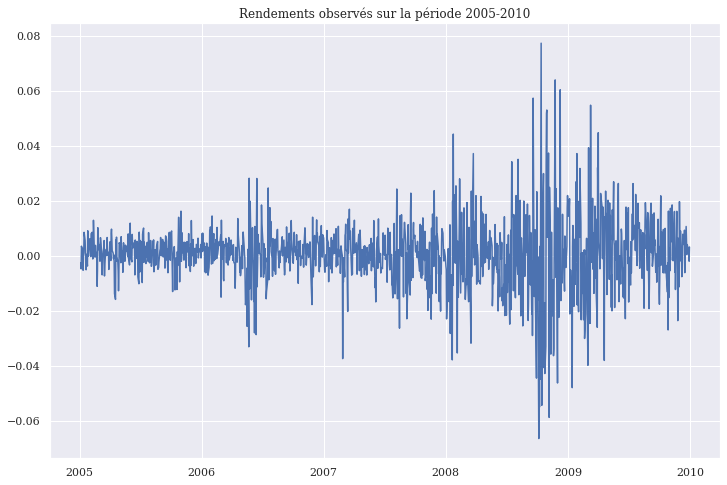

In [198]:
plt.plot(Portfolio)
plt.title("Rendements observés sur la période 2005-2010")

In [199]:
# Le calcul du rendement annualisé est réalisé avec la fonction annu_rend du module portfolio_functions
annu_rend = pf.annu_rend(Portfolio,show=True)
annu_rend = pf.portfolio_rend(np.array(list(w_equal.values())),rends_train,show=True)
# Les deux fonctions se valent, elles seront utilisées par la suite

# Le calcul du rendement annualisé est réalisé avec la fonction annu_vol du module portfolio_functions
annu_vol = pf.annu_vol(Portfolio,show=True)
annu_vol = pf.portfolio_vol(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
annu_var = pf.portfolio_var(np.array(list(w_equal.values())),pf.cov(rends_train),show=True)
# Les deux fonctions se valent cependant elles ne fonctionnent pas de la même manière

On obtient un rendement annualisé sur la période de 12.071%.
On obtient un rendement annualisé sur la période de 12.071%.
On obtient une volatilité annualisée sur la période de 19.336%.
On obtient une volatilité annualisée sur la période de 19.336%.
On obtient une variance sur la période de 3.739%.


## a. Portefeuille à poids définis par la méthode Mean-Variance

Nous allons à partir de cette partie implémenter des méthodes d'optimisations en prenant en compte certaines contraintes. Ici on veut optimiser les poids de manière à minimiser la volatilité de notre portefeuille tout en respectant des contraintes :
$$
\textrm{min}\, \omega^{T}\Sigma\omega\\\textrm{s.t}\, \mu^{T}\omega=\mu_{obj} \, \textrm{and} \, \sum_{i=0}^{n}\omega_{i}=1
$$

Où $\omega$ est le vecteur des poids, $\Sigma$ la matrice de covariance de notre panier d'action, $\mu$ est le vecteur des rendements annualisés et $\mu_{obj}$ est le rendement souhaité.

In [255]:
# Pour calculer la covariance annualisée nous utilisons la fonction annu_cov du module pf
cov = pf.cov(rends_train)
cov

,ASML,MC.PA,NVS,CFR.SW,ABB,RMS.PA,KER.PA,RI.PA,CAP.PA,6S=F,...,QGEN,TRN.MI,TELIA.ST,RAND.AS,JMT.LS,LI.PA,BOL.PA,DIE.BR,GFC.PA,COV.PA
ASML,0.000627,0.000156,0.000141,0.000134,0.000389,0.000108,0.000157,0.000094,0.000199,0.000037,...,0.000209,0.000021,0.000139,0.000225,0.000066,0.000124,0.000055,0.000080,0.000147,0.000098
MC.PA,0.000156,0.000373,0.000041,0.000302,0.000239,0.000199,0.000322,0.000193,0.000283,-0.000029,...,0.000063,0.000074,0.000180,0.000306,0.000137,0.000227,0.000103,0.000144,0.000204,0.000184
NVS,0.000141,0.000041,0.000220,0.000024,0.000149,0.000040,0.000019,0.000056,0.000033,0.000058,...,0.000134,0.000013,0.000048,0.000059,0.000016,0.000038,0.000028,0.000021,0.000018,0.000024
CFR.SW,0.000134,0.000302,0.000024,0.000454,0.000225,0.000190,0.000324,0.000167,0.000282,-0.000030,...,0.000053,0.000066,0.000173,0.000312,0.000143,0.000222,0.000116,0.000147,0.000220,0.000185
ABB,0.000389,0.000239,0.000149,0.000225,0.000686,0.000148,0.000255,0.000175,0.000270,0.000025,...,0.000240,0.000061,0.000187,0.000332,0.000137,0.000209,0.000095,0.000138,0.000198,0.000191
RMS.PA,0.000108,0.000199,0.000040,0.000190,0.000148,0.000409,0.000210,0.000138,0.000184,-0.000015,...,0.000047,0.000057,0.000120,0.000219,0.000099,0.000180,0.000079,0.000104,0.000134,0.000160
KER.PA,0.000157,0.000322,0.000019,0.000324,0.000255,0.000210,0.000548,0.000224,0.000321,-0.000030,...,0.000050,0.000072,0.000196,0.000356,0.000161,0.000256,0.000118,0.000194,0.000261,0.000227
RI.PA,0.000094,0.000193,0.000056,0.000167,0.000175,0.000138,0.000224,0.000404,0.000193,-0.000014,...,0.000051,0.000055,0.000127,0.000205,0.000131,0.000163,0.000067,0.000100,0.000153,0.000161
CAP.PA,0.000199,0.000283,0.000033,0.000282,0.000270,0.000184,0.000321,0.000193,0.000565,-0.000041,...,0.000080,0.000072,0.000192,0.000342,0.000141,0.000241,0.000119,0.000155,0.000219,0.000185
6S=F,0.000037,-0.000029,0.000058,-0.000030,0.000025,-0.000015,-0.000030,-0.000014,-0.000041,0.000089,...,0.000049,-0.000020,-0.000022,-0.000031,-0.000021,-0.000029,-0.000014,-0.000014,-0.000023,-0.000024


Maintenant que toutes les fonctions sont prêtes nous pouvons créer la fonction d'optimisation et calculer les points correspondants.

In [256]:
# La fonction opt_mean_variance retourne les poids, le rendement et la volatilité annualisés
W,rend,vol = pf.opt_mean_variance(rends_train,pf.cov(rends_train),obj_rend=0.0526,show=True)

On obtient un rendement annualisé sur la période de 5.26%.
On obtient une volatilité annualisée sur la période de 9.805%.


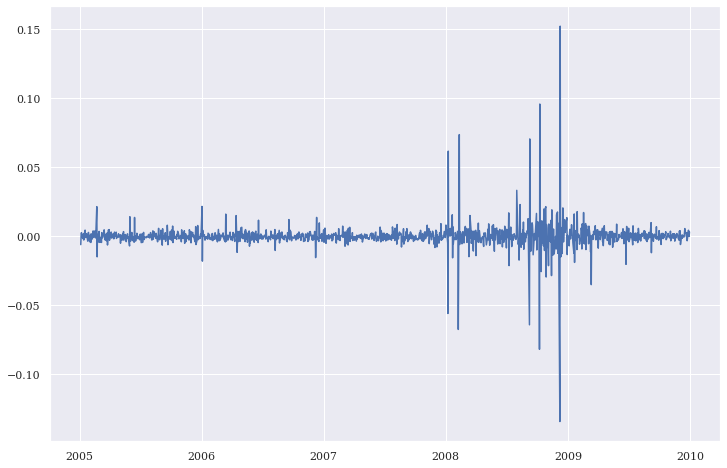

In [252]:
plt.plot(rends_train["6S=F"])

Pour un portefeuille qui a le même rendement que le portefeuille à poids égaux on trouve un portefeuille avec une volatilitée bien plus faible. Ce qui est par ailleurs un résultat cohérent puisque le portefeuille à poids égaux n'est pas sur la frontière efficiente.

In [274]:
mv_rends = np.linspace(0.05265,0.25,25)
mv_vols = []
for i in mv_rends:
    W,mv_rend,mv_vol = pf.opt_mean_variance(rends_train,cov,obj_rend=i,show=False)
    mv_vols.append(mv_vol)

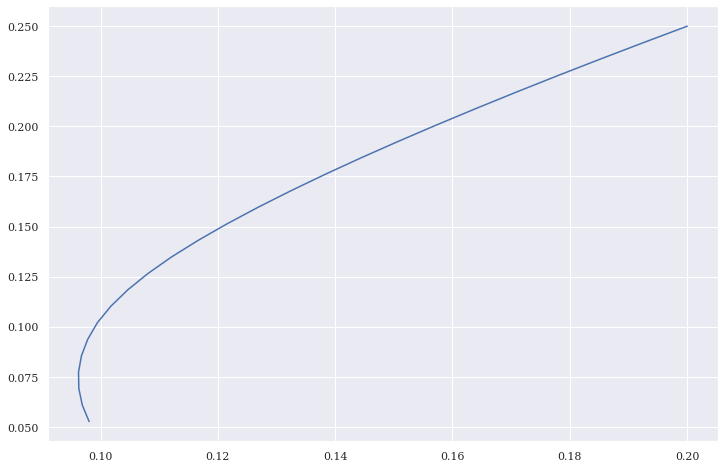

In [275]:
plt.plot(np.array(mv_vols),mv_rends)

In [272]:
# Potentielle valeur de la vol annualisé du GMV
1/(np.ones(rends_train.shape[1])@np.linalg.inv(cov*252)@np.ones(rends_train.shape[1]))**0.5

0.0914820439310862

In [273]:
# Potentielle valeur du rendement annualisé du GMV
pf.annu_rend_df(rends_train,arr=True)@np.linalg.inv(cov*252)@np.ones(rends_train.shape[1])/(np.ones(rends_train.shape[1])@np.linalg.inv(cov*252)@np.ones(rends_train.shape[1]))

0.052650562975039936

C'est pas exactement le résultat trouvé. Reste à trouver l'erreur.